# Defining populations of neurons
In this tutorial we're going to define a population of Izhikevich neurons and configure individual neurons within it to operate in various regimes:
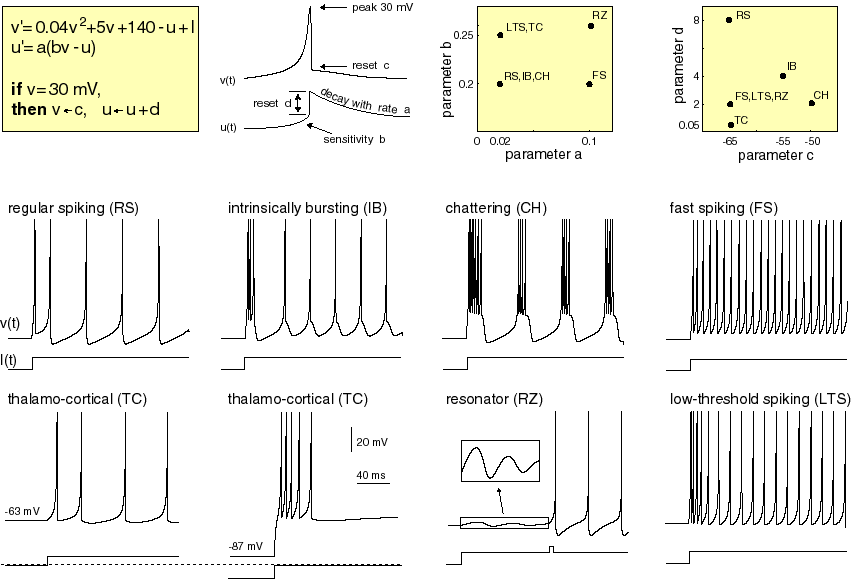

(Electronic version of the figure and reproduction permissions are freely available at www.izhikevich.com)
## Install PyGeNN wheel from Google Drive
Download wheel file

In [1]:
if "google.colab" in str(get_ipython()):
    #import IPython
    #IPython.core.magics.execution.ExecutionMagics.run.func_defaults[2] = lambda a: a
    #%run "../install_collab.ipynb"
    !pip install gdown --upgrade
    !gdown 1V_GzXUDzcFz9QDIpxAD8QNEglcSipssW
    !pip install pygenn-5.0.0-cp310-cp310-linux_x86_64.whl
    %env CUDA_PATH=/usr/local/cuda

Downloading...
From: https://drive.google.com/uc?id=1V_GzXUDzcFz9QDIpxAD8QNEglcSipssW
To: /content/pygenn-5.0.0-cp310-cp310-linux_x86_64.whl
100% 8.29M/8.29M [00:00<00:00, 118MB/s]
Processing ./pygenn-5.0.0-cp310-cp310-linux_x86_64.whl
pygenn is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
env: CUDA_PATH=/usr/local/cuda


## Build model
Import numpy, matplotlib and the main `GeNNModel` class from PyGeNN

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from pygenn import GeNNModel

Create a new model called "tutorial1" with floating point precision and set the simulation timestep to 0.1ms

In [3]:
model = GeNNModel("float", "tutorial1")
model.dt = 0.1

Configure initial state for a population of Izhikevich neurons with a constant value for the `V` and `U` state variables and different values for the `a`, `b`, `c` and `d` parameters (because we are going to be using the `IzhikevichVariable` model, the parameters are also implemented as state variables so they can vary across the population of neurons)

In [4]:
izk_init = {"V": -65.0,
            "U": -20.0,
            "a": [0.02,     0.1,    0.02,   0.02],
            "b": [0.2,      0.2,    0.2,    0.2],
            "c": [-65.0,    -65.0,  -50.0,  -55.0],
            "d": [8.0,      2.0,    2.0,    4.0]}

Add a population of 4 of these neurons (GeNN's built in models are selected by specifying model as a string)

In [5]:
pop = model.add_neuron_population("Neurons", 4, "IzhikevichVariable", {}, izk_init)

Add a DC (i.e. constant) current input to the population to inject a constant current into the neurons and make them spike



In [6]:
model.add_current_source("CurrentSource", "DC", pop, {"amp": 10.0}, {});

Generate code and load it into PyGeNN

In [7]:
model.build()
model.load()

## Simulate tutorial model
State variables in the GeNN model can be accessed directly using memory views. Create a memory view to access the membrane voltage of our neurons

In [8]:
voltage = pop.vars["V"]

We want to record these voltages for each neuron every timestep so, after every we simulate each time step, we copy the membrane voltage back from the GPU and add a copy (because the memory view gives access to the actual simulator state we need to make a copy) to a list

In [10]:
voltages = []
while model.t < 200.0:
    model.step_time()
    voltage.pull_from_device()
    voltages.append(voltage.values)

Plot the voltages over time in 4 seperate panels

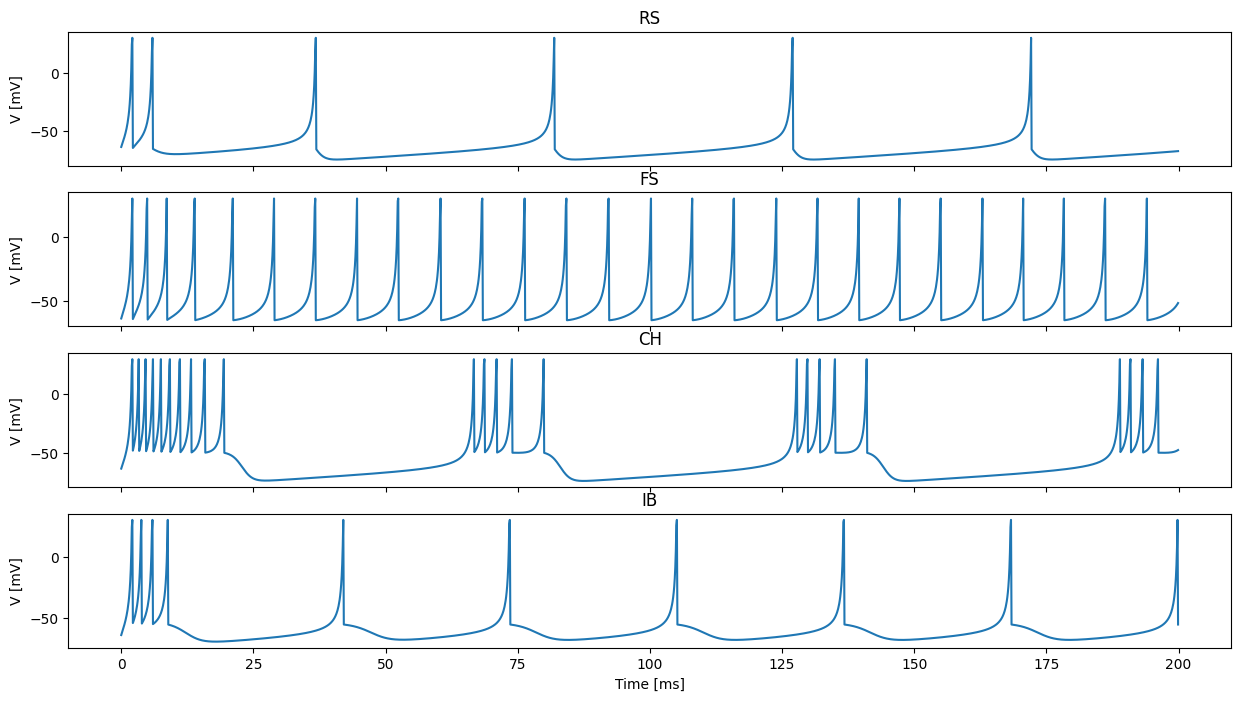

In [11]:
# Stack voltages together into a 2000x4 matrix
voltages = np.vstack(voltages)

# Create figure with 4 axes
fig, axes = plt.subplots(4, sharex=True, figsize=(15, 8))

# Plot voltages of each neuron in
for i, t in enumerate(["RS", "FS", "CH", "IB"]):
    axes[i].set_title(t)
    axes[i].set_ylabel("V [mV]")
    axes[i].plot(np.arange(0.0, 200.0, 0.1), voltages[:,i])

axes[-1].set_xlabel("Time [ms]");

Exercises
---
1. Add three more neurons with the remaining neuron types: Thalamo-cortical, resonator, and low-threshold spiking.
2. Make a neuron that changes its type gradually from the beginning to the end of the simulation. Use a longer simulation time to make this meaningful.